<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Test_Stitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_set_dir = "C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\"
image_set_prefix = 'Test_Neuron1'

os.chdir(image_set_dir)

tif_list=list()
for dir,root,files in os.walk(image_set_dir):
    for f in files:
        if 'CH4.tif' in f:
            tif_list.append(os.path.join(dir,f))


In [3]:
pd_dict = {'file_loc': [t for t in tif_list],
           'xy': [t.split("_")[-3] for t in tif_list],
           'z': [t.split("_")[-2] for t in tif_list]}
image_df = pd.DataFrame(pd_dict)

display(image_df)


,file_loc,xy,z
0,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z001
1,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z002
2,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z003
3,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z004
4,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z005
...,...,...,...
2845,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z110
2846,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z111
2847,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z112
2848,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z113


In [4]:
z_planes = sorted(list(set(image_df['z'])))
print(z_planes)

for cur_z in [z_planes[15]]:
    single_plane_images = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values


['Z001', 'Z002', 'Z003', 'Z004', 'Z005', 'Z006', 'Z007', 'Z008', 'Z009', 'Z010', 'Z011', 'Z012', 'Z013', 'Z014', 'Z015', 'Z016', 'Z017', 'Z018', 'Z019', 'Z020', 'Z021', 'Z022', 'Z023', 'Z024', 'Z025', 'Z026', 'Z027', 'Z028', 'Z029', 'Z030', 'Z031', 'Z032', 'Z033', 'Z034', 'Z035', 'Z036', 'Z037', 'Z038', 'Z039', 'Z040', 'Z041', 'Z042', 'Z043', 'Z044', 'Z045', 'Z046', 'Z047', 'Z048', 'Z049', 'Z050', 'Z051', 'Z052', 'Z053', 'Z054', 'Z055', 'Z056', 'Z057', 'Z058', 'Z059', 'Z060', 'Z061', 'Z062', 'Z063', 'Z064', 'Z065', 'Z066', 'Z067', 'Z068', 'Z069', 'Z070', 'Z071', 'Z072', 'Z073', 'Z074', 'Z075', 'Z076', 'Z077', 'Z078', 'Z079', 'Z080', 'Z081', 'Z082', 'Z083', 'Z084', 'Z085', 'Z086', 'Z087', 'Z088', 'Z089', 'Z090', 'Z091', 'Z092', 'Z093', 'Z094', 'Z095', 'Z096', 'Z097', 'Z098', 'Z099', 'Z100', 'Z101', 'Z102', 'Z103', 'Z104', 'Z105', 'Z106', 'Z107', 'Z108', 'Z109', 'Z110', 'Z111', 'Z112', 'Z113', 'Z114']


In [5]:
!pip install opencv-python
import cv2

In [149]:
def get_square(ind,d=5):
    if (ind+1)%d < 1:
        return None
    if  d**2 < ind+d+1:
        return None
    else:
        ind_01 = ind+d
        ind_10 = ind+1
        ind_11 = ind+1+d
    return [ind,ind_01,ind_10,ind_11]

In [148]:
 ind = 19
 d = 5
 d**2 < ind+d+1

False

In [151]:
order

array([ 0,  1,  2,  3,  4,  9,  8,  7,  6,  5, 10, 11, 12, 13, 14, 19, 18,
       17, 16, 15, 20, 21, 22, 23, 24])

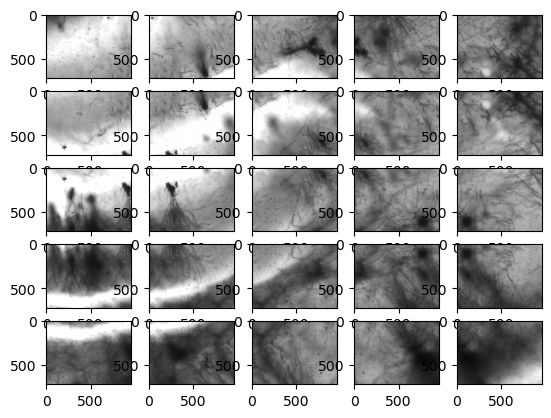

In [135]:
image_data_list = list()
for path in single_plane_images:
    image_data =cv2.imread(path)
    image_data_list.append(image_data)
order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))



image_data_list_sorted = [image_data_list[o] for o in order]
fig,ax=plt.subplots(5,5)
ax = ax.flatten()
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)

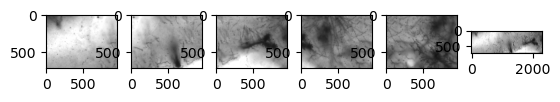

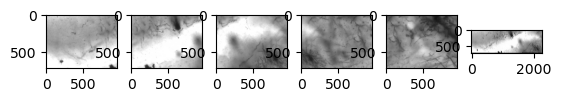

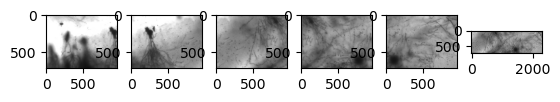

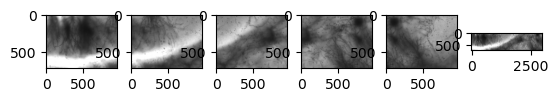

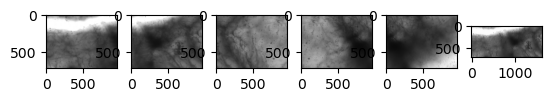

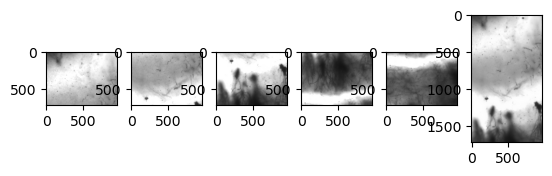

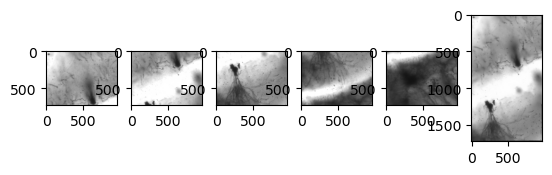

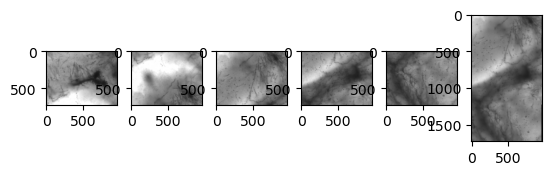

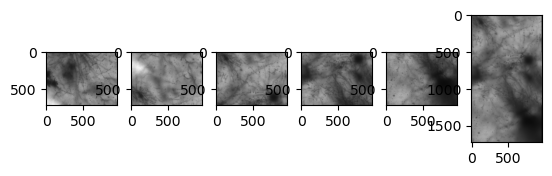

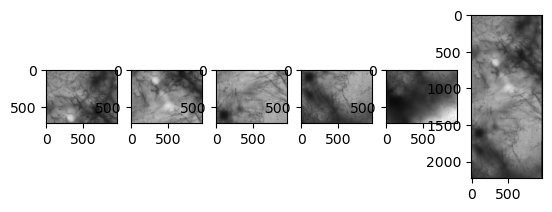

In [177]:
def stitch_row_col(imgs,d):
    rows = [list(np.arange(d)+di*d) for di in range(d)]
    row_stitch_list=list()
    for row in rows:
        img_set = img_set = [imgs[i] for i in row]
        stitched = stitch_wrap_fast(img_set)
        if stitched is not None:
            row_stitch_list.append(stitched)

    cols = [list(np.arange(d)*d + di) for di in range(d)]
    col_stitch_list=list()
    for col in cols:
        img_set = img_set = [imgs[i] for i in col]
        stitched = stitch_wrap_fast(img_set)
        if stitched is not None:
            col_stitch_list.append(stitched)

    full_list = col_stitch_list + row_stitch_list
    return full_list, col_stitch_list, row_stitch_list


full_list, col_stitch_list, row_stitch_list = stitch_row_col(image_data_list_sorted,d=5)


[0, 5, 1, 6]
[1, 6, 2, 7]
[2, 7, 3, 8]
[3, 8, 4, 9]
[5, 10, 6, 11]
[6, 11, 7, 12]
[7, 12, 8, 13]
[8, 13, 9, 14]
[10, 15, 11, 16]
[11, 16, 12, 17]
[12, 17, 13, 18]
[13, 18, 14, 19]
[15, 20, 16, 21]
[16, 21, 17, 22]
[17, 22, 18, 23]
[18, 23, 19, 24]


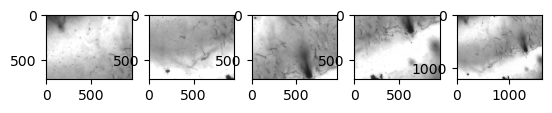

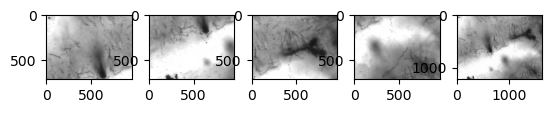

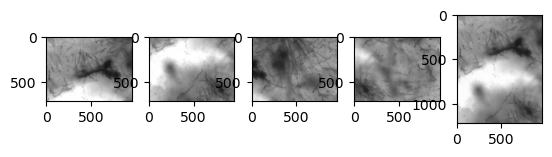

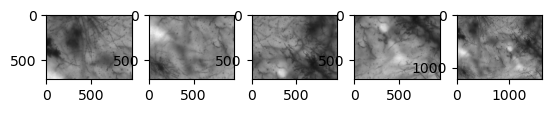

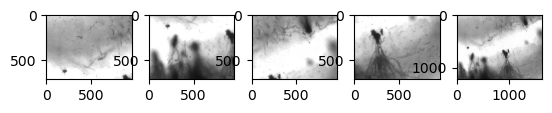

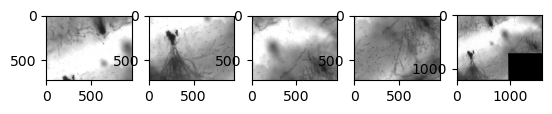

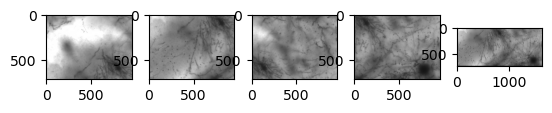

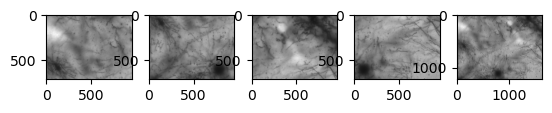

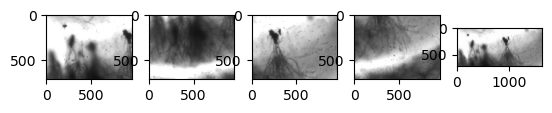

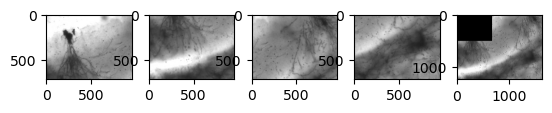

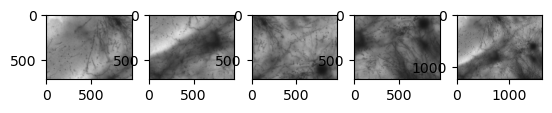

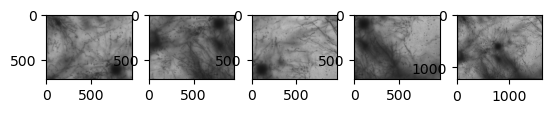

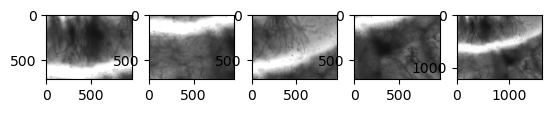

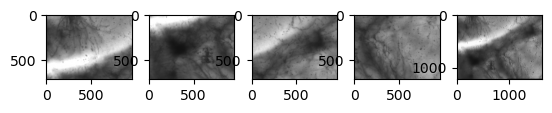

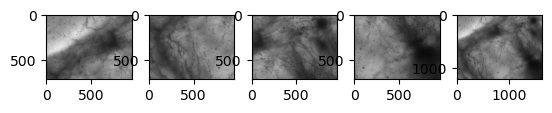

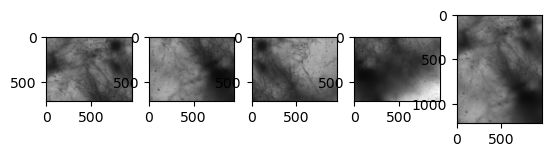

In [152]:
def stitch_wrap_fast(img_set):
    stitcher = cv2.Stitcher_create(mode=1)
    (status, stitched) = stitcher.stitch(img_set)
    fig,ax=plt.subplots(1,len(img_set)+1)
    for i,im in enumerate(img_set):
        ax[i].imshow(im)
    if stitched is not None:
        ax[-1].imshow(stitched)
    return stitched



def iterate_leveled_stitch(imgs):
    stitch_list=list()
    for ind,_ in enumerate(imgs):
        indicies = get_square(ind,d=5)
        if indicies is not None:
            print(indicies)
            img_set = [imgs[i] for i in indicies]
            stitched = stitch_wrap_fast(img_set)
            if stitched is not None:
                stitch_list.append(stitched)
    return stitch_list


stitch_list_L1 = iterate_leveled_stitch(image_data_list_sorted)

In [ ]:
stitch_list_L2 = iterate_leveled_stitch(stitch_list_L1)

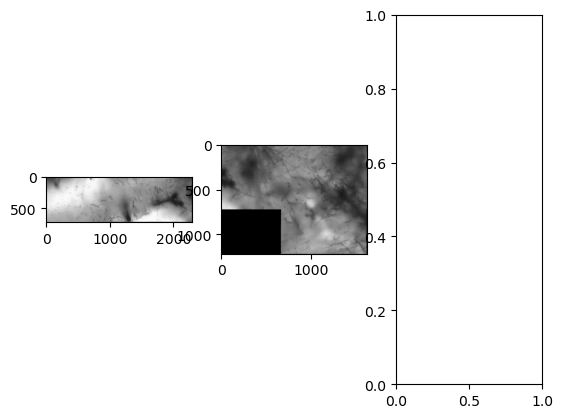

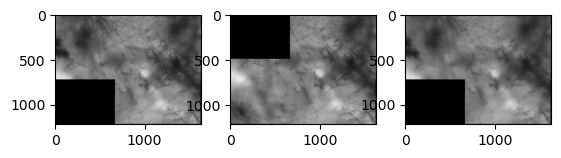

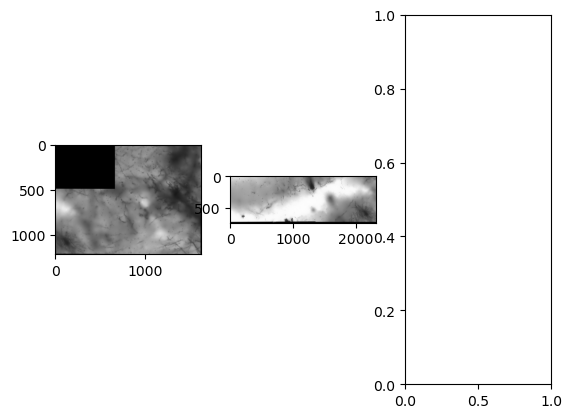

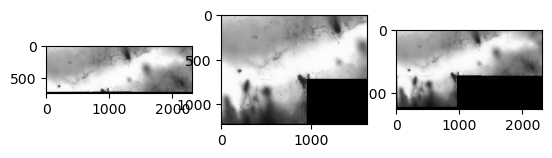

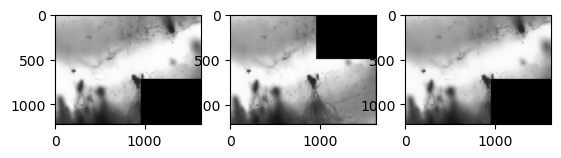

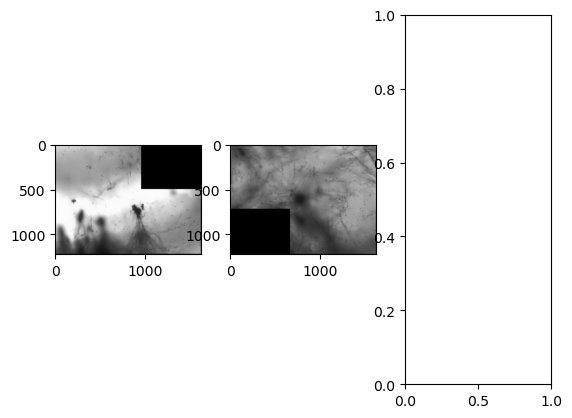

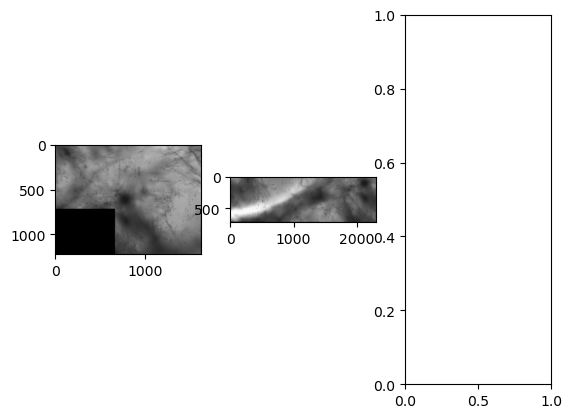

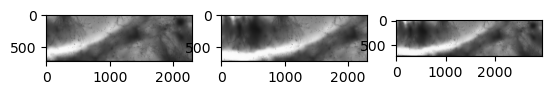

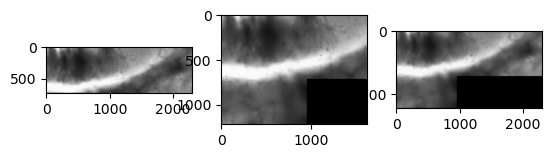

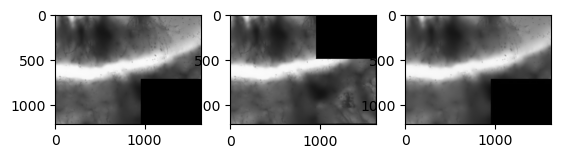

In [48]:
stitch_list_L3 = iterate_leveled_stitch(stitch_list_L2)

In [ ]:
def stitch_wrap(imgs):
    vert = False
    cv2.Stitcher_create('mode':1)
    (status, stitched) = stitcher.stitch(imgs)
    fig,ax=plt.subplots()
    if status==0:
        ax.imshow(stitched)
        print(stitched.shape)
        vert =  np.shape(stitched)[0] /  np.shape(stitched)[1]   >1
        print(vert)
    if vert: fig,ax=plt.subplots(len(imgs),1)
    else: fig,ax=plt.subplots(1, len(imgs))
    for i,im in enumerate(imgs):
        ax[i].imshow(im)
    plt.show()

pair1 = [image_data_list_sorted[0], image_data_list_sorted[5]]

for current_im, next_im in zip(image_data_list_sorted[:-1], image_data_list_sorted[1:]):
    stitch_wrap([current_im,next_im])

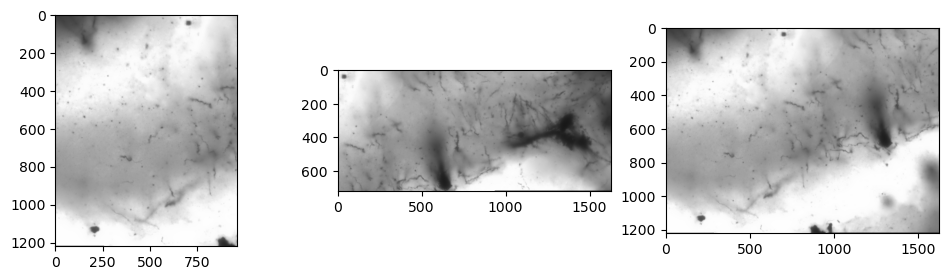

In [ ]:
pair1 = [image_data_list_sorted[0], image_data_list_sorted[5]]
(status, stitched1) = stitcher.stitch(pair1)

pair2 = [image_data_list_sorted[1], image_data_list_sorted[2]]
(status, stitched2) = stitcher.stitch(pair2)

quad = [image_data_list_sorted[0], image_data_list_sorted[5], image_data_list_sorted[1], image_data_list_sorted[6]]
(status, stitched4) = stitcher.stitch(quad)

fig,ax=plt.subplots(1,3,figsize=(12,3))
ax[0].imshow(stitched1)
ax[1].imshow(stitched2)
ax[2].imshow(stitched4)

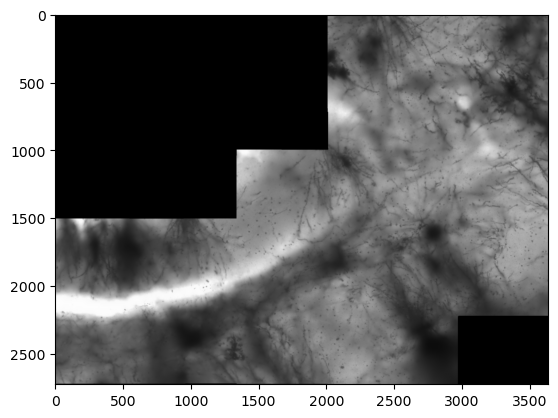

In [ ]:
(status, stitched_full) = stitcher.stitch(image_data_list_sorted)
plt.imshow(stitched_full)

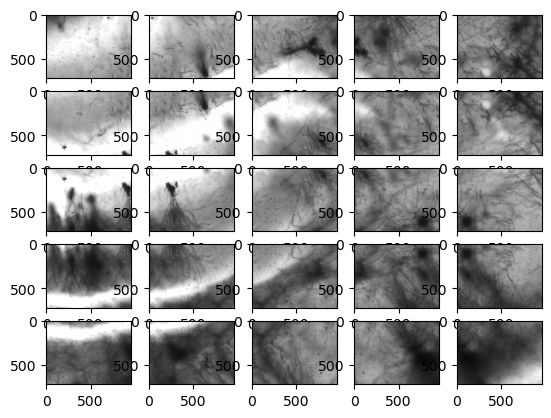

In [ ]:
fig,ax=plt.subplots(5,5)
ax = ax.flatten()
image_data_list_sorted = [image_data_list[o] for o in order]
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)